In [135]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import json
import pandas as pd

In [136]:
import json
# Your data
with open('trades.json', 'r') as f:
    data = json.load(f)

In [137]:
df = pd.DataFrame(data)
df.head()

,symbol,price,volume,timestamp_unix,conditions
0,BINANCE:BTCUSDT,37384.35,0.00970,1700130322620,None
1,BINANCE:BTCUSDT,37384.35,0.00027,1700130322620,None
2,BINANCE:BTCUSDT,37384.34,0.00089,1700130322631,None
3,BINANCE:BTCUSDT,37384.35,0.00480,1700130323378,None
4,BINANCE:BTCUSDT,37384.35,0.00090,1700130322979,None


In [138]:
# convert unix milliseconds timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp_unix'], unit='ms')

df.drop(['timestamp_unix'], axis=1, inplace=True)
df.drop(['conditions'], axis=1, inplace=True)
df.head()

,symbol,price,volume,datetime
0,BINANCE:BTCUSDT,37384.35,0.00970,2023-11-16 10:25:22.620
1,BINANCE:BTCUSDT,37384.35,0.00027,2023-11-16 10:25:22.620
2,BINANCE:BTCUSDT,37384.34,0.00089,2023-11-16 10:25:22.631
3,BINANCE:BTCUSDT,37384.35,0.00480,2023-11-16 10:25:23.378
4,BINANCE:BTCUSDT,37384.35,0.00090,2023-11-16 10:25:22.979


In [139]:
# Assuming df is your dataframe
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,symbol,price,volume,datetime
0,BINANCE:BTCUSDT,37384.35,0.00970,2023-11-16 10:25:22.620
1,BINANCE:BTCUSDT,37384.35,0.00027,2023-11-16 10:25:22.620
2,BINANCE:BTCUSDT,37384.34,0.00089,2023-11-16 10:25:22.631
3,BINANCE:BTCUSDT,37384.35,0.00480,2023-11-16 10:25:23.378
4,BINANCE:BTCUSDT,37384.35,0.00090,2023-11-16 10:25:22.979


In [140]:
# Group by date and symbol, and aggregate OHLC values
ohlc_df = df.groupby(['symbol', pd.Grouper(key='datetime', freq='1T')]).agg({
    'price': ['first', 'max', 'min', 'last'],
    'volume': 'sum'
}).reset_index()
ohlc_df.head()

symbol            datetime     price                      \
                                           first       max       min   
0  BINANCE:BTCUSDT 2023-11-16 10:25:00  37384.35  37384.35  37368.85   
1  BINANCE:BTCUSDT 2023-11-16 10:26:00  37376.00  37382.00  37375.99   
2  BINANCE:BTCUSDT 2023-11-16 10:27:00  37376.01  37376.01  37371.97   
3  BINANCE:BTCUSDT 2023-11-16 10:28:00  37371.97  37371.98  37371.97   
4  BINANCE:BTCUSDT 2023-11-16 10:29:00  37371.98  37383.27  37371.97   

               volume  
       last       sum  
0  37375.99  22.12315  
1  37376.00  20.99052  
2  37371.98   5.37475  
3  37371.97   9.87091  
4  37383.18   8.80907

In [141]:
# Rename columns for better readability
ohlc_df.columns = ['symbol', 'datetime', 'open', 'high', 'low', 'close', 'volume']

# Display the resulting OHLC dataframe
ohlc_df.head()

,symbol,datetime,open,high,low,close,volume
0,BINANCE:BTCUSDT,2023-11-16 10:25:00,37384.35,37384.35,37368.85,37375.99,22.12315
1,BINANCE:BTCUSDT,2023-11-16 10:26:00,37376.00,37382.00,37375.99,37376.00,20.99052
2,BINANCE:BTCUSDT,2023-11-16 10:27:00,37376.01,37376.01,37371.97,37371.98,5.37475
3,BINANCE:BTCUSDT,2023-11-16 10:28:00,37371.97,37371.98,37371.97,37371.97,9.87091
4,BINANCE:BTCUSDT,2023-11-16 10:29:00,37371.98,37383.27,37371.97,37383.18,8.80907


In [142]:
import mplfinance as mpf

# https://pypi.org/project/mplfinance/

#  mpf.plot(data)
# where data is a Pandas DataFrame object containing :
# Open, High, Low and Close data, with a Pandas DatetimeIndex.

In [143]:
# make datetime column to a datetimeIndex:
ohlc_df = ohlc_df.set_index('datetime')
ohlc_df.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-11-16 10:25:00,BINANCE:BTCUSDT,37384.35,37384.35,37368.85,37375.99,22.12315
2023-11-16 10:26:00,BINANCE:BTCUSDT,37376.00,37382.00,37375.99,37376.00,20.99052
2023-11-16 10:27:00,BINANCE:BTCUSDT,37376.01,37376.01,37371.97,37371.98,5.37475
2023-11-16 10:28:00,BINANCE:BTCUSDT,37371.97,37371.98,37371.97,37371.97,9.87091
2023-11-16 10:29:00,BINANCE:BTCUSDT,37371.98,37383.27,37371.97,37383.18,8.80907


In [144]:
# rename columns for mplfinance
ohlc_df.rename(columns={'open': 'Open'}, inplace=True)
ohlc_df.rename(columns={'high': 'High'}, inplace=True)
ohlc_df.rename(columns={'low': 'Low'}, inplace=True)
ohlc_df.rename(columns={'close': 'Close'}, inplace=True)
ohlc_df.rename(columns={'volume': 'Volume'}, inplace=True)
ohlc_df.head()

,symbol,Open,High,Low,Close,Volume
datetime,,,,,,
2023-11-16 10:25:00,BINANCE:BTCUSDT,37384.35,37384.35,37368.85,37375.99,22.12315
2023-11-16 10:26:00,BINANCE:BTCUSDT,37376.00,37382.00,37375.99,37376.00,20.99052
2023-11-16 10:27:00,BINANCE:BTCUSDT,37376.01,37376.01,37371.97,37371.98,5.37475
2023-11-16 10:28:00,BINANCE:BTCUSDT,37371.97,37371.98,37371.97,37371.97,9.87091
2023-11-16 10:29:00,BINANCE:BTCUSDT,37371.98,37383.27,37371.97,37383.18,8.80907


In [146]:
# drop last row
ohlc_df = ohlc_df[:-1]

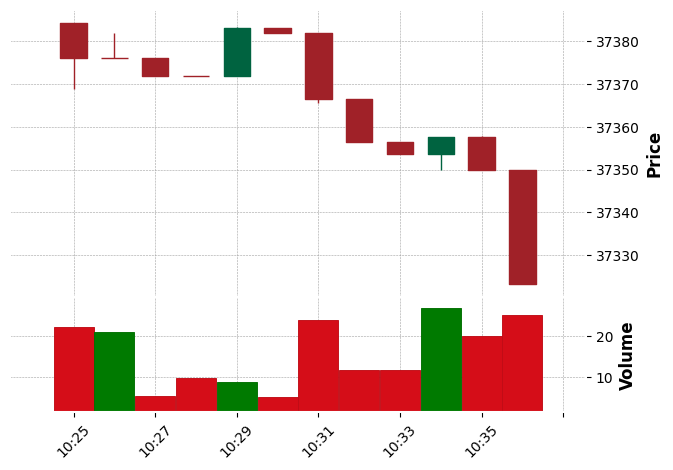

In [147]:
mpf.plot(ohlc_df, type='candle', style='charles', volume=True)